<a href="https://colab.research.google.com/github/kevinrsun05/AlzheimersKNNProject/blob/main/Alzheimers_Feature_Importance_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

60
60 60
0.7


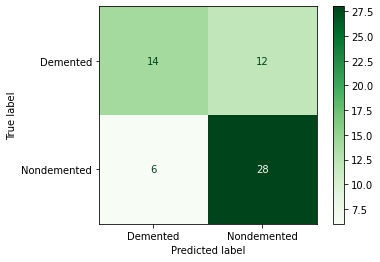

In [ ]:
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

#Importing Data Set
patients = pd.read_csv("alzheimer.csv")
# 'Group','M/F',
#Dropping unwanted columns
patients = patients.drop(['SES','CDR'],axis=1)
#Dropping specific patients with Converted as their Group variable
patients = patients[patients.Group != 'Converted']
#Displaying current dataset after changes
patients.head()
#Changing Males and Females to numeric values
mapping_MF = {'M': 0, 'F': 1}
#Changing Demented and Nondemented patients to numeric values
mapping_Group = {'Nondemented':0, 'Demented':1}
#Changing non numeric value variables to numbers
patients = patients.replace({'Group':mapping_Group, 'M/F': mapping_MF})
#Drop all rows with missing values
patients = patients.dropna()

#Normalizing all the data within the Age Column
age = patients[['Age']].values
min_max_scaler = preprocessing.MinMaxScaler()
age_scaled = min_max_scaler.fit_transform(age)
patients['Age'] = pd.DataFrame(age_scaled)

#Normalizing all the data within the Years of Education Column
education = patients[['EDUC']].values
education_scaled = min_max_scaler.fit_transform(education)
patients['EDUC'] = pd.DataFrame(education_scaled)

#Normalizing all the data within the Mini Mental State Examination Column
mental_state = patients[['MMSE']].values
mmse_scaled = min_max_scaler.fit_transform(mental_state)
patients['MMSE'] = pd.DataFrame(mmse_scaled)

#Normalizing all the data within the estimated Total Intracranial Volume Column
intracranial_v = patients[['eTIV']].values
eTIV_scaled = min_max_scaler.fit_transform(intracranial_v)
patients['eTIV'] = pd.DataFrame(eTIV_scaled)

#Normalizing all the data within the Atlas Scaling Factor Column
atlas_scaling = patients[['ASF']].values
ASF_scaled = min_max_scaler.fit_transform(atlas_scaling)
patients['ASF'] = pd.DataFrame(ASF_scaled)
patients = patients.dropna()

#Normalized Whole Brain Volume, doesn't need to be normalized

from sklearn.neighbors import KNeighborsClassifier

#from IPython.display import display

from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
'''
dep_var = "Demented"
cond = np.random.rand(len(patients))>.2
train = np.where(cond)[0]
valid = np.where(~cond)[0]

len(train), len(valid)

train_df = patients.iloc[train]
valid_df = patients.iloc[valid]
len(train_df),len(valid_df)

train_y = train_df['Group']
train_xs = train_df.drop(['Group'],axis=1)

valid_y = valid_df['Group']
valid_xs = valid_df.drop(['Group'],axis=1)

m = KNeighborsClassifier()
m = m.fit(train_xs,train_y)
'''
'''
cm = confusion_matrix(estimator=m,X=valid_xs,y_true=valid_y,cmap=plt.cm.Greens)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
'''
#Remove target variable
X = patients.drop(columns=['Group'])
#Set y to target variable
y = patients['Group']
#Split the data into 80/20 split for trainning and testing,
#stratify=y ensures that our splits will always be consistent 80/20 split of patients with Demnentia and patients without Dementia
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1, stratify = y)
#Checking number of y_tests
print(len(y_test))

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, np.ravel(y_train,order='C'))

y_pred = classifier.predict(X_test)
print(len(y_test),len(y_pred))
#Making Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
#Plotting Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp = disp.plot(cmap=plt.cm.Greens,values_format='g')

#ConfusionMatrixDisplay.from_estimator(estimator=m,X=y_test,y=y_pred,cmap=plt.cm.Greens)
#plot_confusion_matrix(X=valid_xs,y_true=valid_y,cmap=plt.cm.Greens)

std_score = m.score(valid_xs,valid_y)
print(std_score)
'''
data = {'Age':[0],'EDUC':[0],'MMSE':[0],'eTIV':[0],'nWBV':[0],'ASF':[0],'M/F':[0]}
feat_imp = pd.DataFrame(data)
print(feat_imp.head())

#Repeat this section: AGE
print(valid_xs.head())

valid_Age = valid_xs.copy()
valid_Age['Age'] = np.random.permutation(valid_Age['Age'])
valid_Age.head()
m.score(valid_Age,valid_y)

feat_imp['Age'] = std_score - m.score(valid_Age,valid_y)
print(feat_imp.head())
#plt.show()

# EDUC

valid_xs.head()

valid_EDUC = valid_xs.copy()
valid_EDUC['EDUC'] = np.random.permutation(valid_EDUC['EDUC'])
valid_EDUC.head()
m.score(valid_EDUC,valid_y)

feat_imp['EDUC'] = std_score - m.score(valid_EDUC,valid_y)
print(feat_imp.head())
#MMSE
valid_xs.head()

valid_MMSE = valid_xs.copy()
valid_MMSE['MMSE'] = np.random.permutation(valid_MMSE['MMSE'])
valid_MMSE.head()
m.score(valid_MMSE,valid_y)

feat_imp['MMSE'] = std_score - m.score(valid_MMSE,valid_y)
print(feat_imp.head())
#eTIV
valid_xs.head()

valid_eTIV = valid_xs.copy()
valid_eTIV['eTIV'] = np.random.permutation(valid_eTIV['eTIV'])
valid_eTIV.head()
m.score(valid_eTIV,valid_y)

feat_imp['eTIV'] = std_score - m.score(valid_eTIV,valid_y)
print(feat_imp.head())
#nWBV
valid_xs.head()

valid_nWBV = valid_xs.copy()
valid_nWBV['nWBV'] = np.random.permutation(valid_nWBV['nWBV'])
valid_nWBV.head()
m.score(valid_nWBV,valid_y)

feat_imp['nWBV'] = std_score - m.score(valid_nWBV,valid_y)
print(feat_imp.head())
#ASF
valid_xs.head()

valid_ASF = valid_xs.copy()
valid_ASF['ASF'] = np.random.permutation(valid_ASF['ASF'])
valid_ASF.head()
m.score(valid_ASF,valid_y)

feat_imp['ASF'] = std_score - m.score(valid_ASF,valid_y)
print(feat_imp.head())
#M/F
valid_xs.head()

valid_MF = valid_xs.copy()
valid_MF['M/F'] = np.random.permutation(valid_MF['M/F'])
valid_MF.head()
m.score(valid_MF,valid_y)

feat_imp['M/F'] = std_score - m.score(valid_MF,valid_y)
print(feat_imp.head())
'''
plt.show()

In [ ]:
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


patients = pd.read_csv("alzheimer.csv")
# 'Group','M/F',
patients = patients.drop(['SES','CDR'],axis=1)
patients = patients[patients.Group != 'Converted']
patients.head()
mapping_MF = {'M': 0, 'F': 1}
patients = patients.replace({ 'M/F': mapping_MF})
patients = patients.dropna()

age = patients[['Age']].values
min_max_scaler = preprocessing.MinMaxScaler()
age_scaled = min_max_scaler.fit_transform(age)
patients['Age'] = pd.DataFrame(age_scaled)

education = patients[['EDUC']].values
education_scaled = min_max_scaler.fit_transform(education)
patients['EDUC'] = pd.DataFrame(education_scaled)
'''
ses = patients[['SES']].values
ses_scaled = min_max_scaler.fit_transform(ses)
patients['SES'] = pd.DataFrame(ses_scaled)
'''
mental_state = patients[['MMSE']].values
mmse_scaled = min_max_scaler.fit_transform(mental_state)
patients['MMSE'] = pd.DataFrame(mmse_scaled)

intracranial_v = patients[['eTIV']].values
eTIV_scaled = min_max_scaler.fit_transform(intracranial_v)
patients['eTIV'] = pd.DataFrame(eTIV_scaled)

atlas_scaling = patients[['ASF']].values
ASF_scaled = min_max_scaler.fit_transform(atlas_scaling)
patients['ASF'] = pd.DataFrame(ASF_scaled)
patients = patients.dropna()
patients.head()

,Group,M/F,Age,EDUC,MMSE,eTIV,nWBV,ASF
0,Nondemented,0,0.710526,0.470588,0.884615,0.981069,0.696,0.009845
1,Nondemented,0,0.736842,0.470588,1.000000,1.000000,0.681,0.000000
2,Demented,0,0.394737,0.352941,0.730769,0.636971,0.736,0.239100
3,Demented,0,0.421053,0.352941,0.923077,0.703786,0.713,0.188467
4,Demented,0,0.526316,0.352941,0.692308,0.659243,0.701,0.222222


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#from IPython.display import display

from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

dep_var = "Demented"
cond = np.random.rand(len(patients))>.2
train = np.where(cond)[0]
valid = np.where(~cond)[0]

len(train), len(valid)

(235, 65)

In [ ]:
train_df = patients.iloc[train]
valid_df = patients.iloc[valid]
len(train_df),len(valid_df)

(235, 65)

0.7


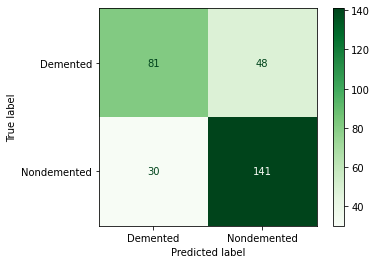

In [ ]:
train_y = train_df['Group']
train_xs = train_df.drop(['Group'],axis=1)

valid_y = valid_df['Group']
valid_xs = valid_df.drop(['Group'],axis=1)

X = patients.drop(columns=['Group'])
y = patients['Group'].values
train_xs, valid_xs, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)
#train_xs, valid_xs, train_y, valid_y = train_test_split(X, y, test_size = 0.2)

m = KNeighborsClassifier()
m = m.fit(train_xs,train_y)

ConfusionMatrixDisplay.from_estimator(estimator=m,X=X,y=y,cmap=plt.cm.Greens)

std_score = m.score(valid_xs,valid_y)

print(std_score)

In [ ]:



data = {'Age':[0],'EDUC':[0],'MMSE':[0],'eTIV':[0],'nWBV':[0],'ASF':[0],'M/F':[0]}
feat_imp = pd.DataFrame(data)
print(feat_imp.head())
multiple = [0,0,0,0,0,0,0]
#Repeat this section: AGE
print(valid_xs.head())
for x in range(10):
  valid_Age = valid_xs.copy()
  valid_Age['Age'] = np.random.permutation(valid_Age['Age'])
  valid_Age.head()
  m.score(valid_Age,valid_y)

  feat_imp['Age'] = std_score - m.score(valid_Age,valid_y)
  multiple[0] += std_score - m.score(valid_Age,valid_y)
  #print(feat_imp.head())
  #plt.show()

  # EDUC

  valid_xs.head()

  valid_EDUC = valid_xs.copy()
  valid_EDUC['EDUC'] = np.random.permutation(valid_EDUC['EDUC'])
  valid_EDUC.head()
  m.score(valid_EDUC,valid_y)

  feat_imp['EDUC'] = std_score - m.score(valid_EDUC,valid_y)
  multiple[1] += std_score - m.score(valid_EDUC,valid_y)
  #print(feat_imp.head())
  #MMSE
  valid_xs.head()

  valid_MMSE = valid_xs.copy()
  valid_MMSE['MMSE'] = np.random.permutation(valid_MMSE['MMSE'])
  valid_MMSE.head()
  m.score(valid_MMSE,valid_y)

  feat_imp['MMSE'] = std_score - m.score(valid_MMSE,valid_y)
  multiple[2] += std_score - m.score(valid_MMSE,valid_y)
  #print(feat_imp.head())
  #eTIV
  valid_xs.head()

  valid_eTIV = valid_xs.copy()
  valid_eTIV['eTIV'] = np.random.permutation(valid_eTIV['eTIV'])
  valid_eTIV.head()
  m.score(valid_eTIV,valid_y)

  feat_imp['eTIV'] = std_score - m.score(valid_eTIV,valid_y)
  multiple[3] += std_score - m.score(valid_eTIV,valid_y)
  #print(feat_imp.head())
  #nWBV
  valid_xs.head()

  valid_nWBV = valid_xs.copy()
  valid_nWBV['nWBV'] = np.random.permutation(valid_nWBV['nWBV'])
  valid_nWBV.head()
  m.score(valid_nWBV,valid_y)

  feat_imp['nWBV'] = std_score - m.score(valid_nWBV,valid_y)
  multiple[4] += std_score - m.score(valid_nWBV,valid_y)
  #print(feat_imp.head())
  #ASF
  valid_xs.head()

  valid_ASF = valid_xs.copy()
  valid_ASF['ASF'] = np.random.permutation(valid_ASF['ASF'])
  valid_ASF.head()
  m.score(valid_ASF,valid_y)

  feat_imp['ASF'] = std_score - m.score(valid_ASF,valid_y)
  multiple[5] += std_score - m.score(valid_ASF,valid_y)
  #print(feat_imp.head())
  #M/F
  valid_xs.head()

  valid_MF = valid_xs.copy()
  valid_MF['M/F'] = np.random.permutation(valid_MF['M/F'])
  valid_MF.head()
  m.score(valid_MF,valid_y)

  feat_imp['M/F'] = std_score - m.score(valid_MF,valid_y)
  multiple[6] += std_score - m.score(valid_MF,valid_y)
for x in range(7):
  multiple[x] /= 10
print(feat_imp.head())
print(multiple)
plt.show()

   Age  EDUC  MMSE  eTIV  nWBV  ASF  M/F
0    0     0     0     0     0    0    0
     M/F       Age      EDUC      MMSE      eTIV   nWBV       ASF
77     1  0.236842  0.470588  0.423077  0.250557  0.733  0.621660
51     0  0.789474  0.352941  0.653846  0.223831  0.737  0.655415
43     1  0.342105  0.352941  1.000000  0.280624  0.662  0.586498
230    0  0.473684  0.470588  0.423077  0.328508  0.670  0.530239
90     0  0.236842  0.588235  1.000000  0.428731  0.679  0.423347
        Age  EDUC  MMSE  eTIV      nWBV       ASF       M/F
0 -0.033333   0.1   0.1  0.15  0.033333  0.116667  0.116667
[0.04999999999999997, 0.05333333333333329, 0.044999999999999964, 0.06999999999999995, 0.024999999999999967, 0.08333333333333329, 0.09999999999999995]


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 70.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
patients = pd.read_csv("alzheimer.csv")
patients = patients.drop(['SES','CDR'],axis=1)
patients = patients[patients.Group != 'Converted']
mapping_MF = {'M': 0, 'F': 1}
mapping_Group = {'Nondemented': 0, 'Demented': 1}
patients = patients.replace({'Group':mapping_Group, 'M/F': mapping_MF})
patients = patients.dropna()

X = patients.drop(columns=['Group'])
y = patients['Group'].values
#X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

0.2673855182772614

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,n_repeats=30,random_state=0)

print(r.importances_mean.argsort())

for i in r.importances_mean.argsort():
      print(f"{r.importances_mean[i]:.3f}"f" +/- {r.importances_std[i]:.3f}")


[5 1 6 2 0 4 3]
-0.000 +/- 0.052
0.021 +/- 0.031
0.028 +/- 0.024
0.030 +/- 0.031
0.090 +/- 0.049
0.153 +/- 0.063
0.472 +/- 0.100


Best alpha using built-in LassoCV: 0.001271
Best score using built-in LassoCV: 0.447676
Lasso picked 6 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

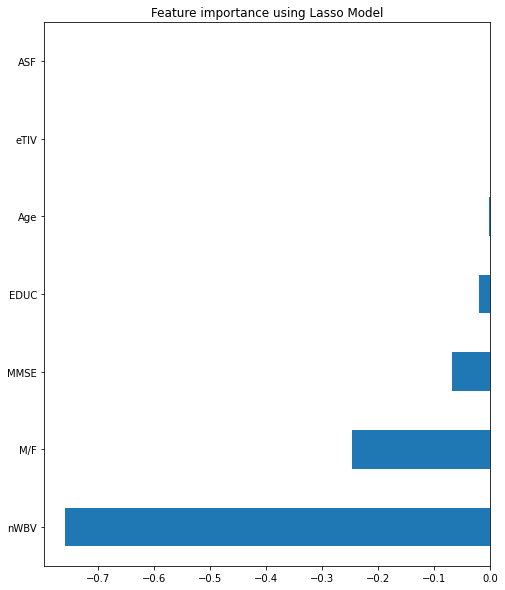

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset

df = pd.read_csv("alzheimer.csv")
df = df.drop(['SES','CDR'],axis=1)
df = df[df.Group != 'Converted']
df.head()
mapping_MF = {'M': 0, 'F': 1}
mapping_Group = {'Demented':1,'Nondemented':0}
df = df.replace({'Group':mapping_Group,'M/F': mapping_MF})
df = df.dropna()

X = df.drop(columns=['Group']) #Feature Matrix
y = df["Group"]          #Target Variable
df.head()

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso


df = pd.read_csv('alzheimer.csv')
features = list(df.columns.values)
df = df.drop(['SES','CDR'],axis=1)
df = df[df.Group != 'Converted']
mapping_MF = {'M': 0, 'F': 1}
mapping_Group = {'Nondemented':0,'Demented':1}
df = df.replace({'Group':mapping_Group, 'M/F': mapping_MF})
df = df.dropna()
X = df.drop(columns=['Group'])
y = df['Group'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train,y_train)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.162 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.167 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.162 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.188 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.156 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.194 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.206 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.183 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.213 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.185 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.238 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

KeyboardInterrupt: ignored

In [ ]:
importance = np.abs(coefficients)
print(importance)

[0.         0.         0.         0.19906063 0.         0.
 0.        ]
